 **Import Modules from Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/BonthuManojKumarReddy/ML-Classification/main/data_cardiovascular_risk.csv')

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# **Preprocessing the data**

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# statistical info
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
# Checking for duplication
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**Checking Null values**

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Text(0, 0.5, 'Percentage')

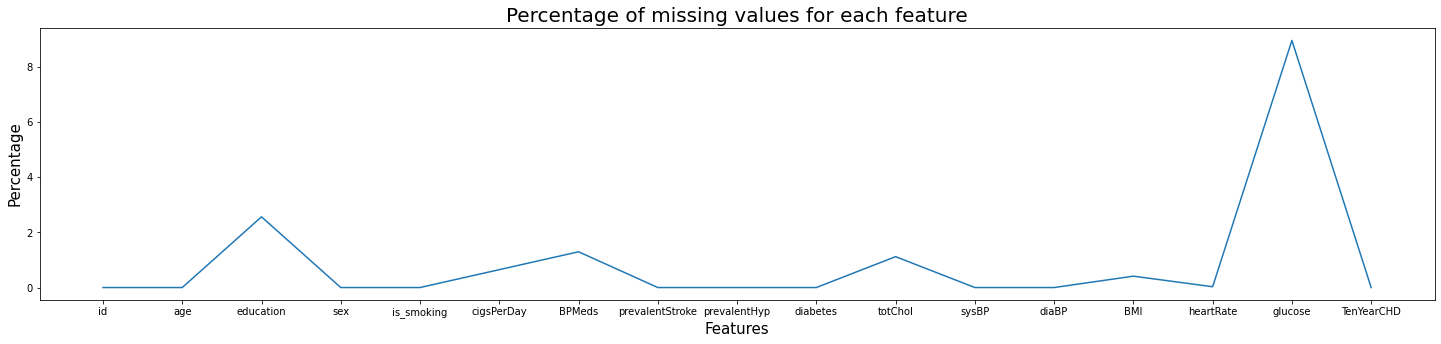

In [ ]:
# Plotting missing values of each feature
plt.figure(figsize=(25,5))
missing_percentages=df.isnull().sum()*100/df.shape[0]
plt.plot(missing_percentages)
plt.title('Percentage of missing values for each feature',fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

**Filling null values with mode**

In [5]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [6]:
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0],inplace=True)

In [7]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)

In [8]:
df['totChol'].fillna(df['totChol'].mode()[0],inplace=True)

In [9]:
df['BMI'].fillna(df['BMI'].mode()[0],inplace=True)

In [10]:
df['heartRate'].fillna(df['heartRate'].mode()[0],inplace=True)

In [11]:
df['glucose'].fillna(df['glucose'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
df.drop('id',axis=1,inplace=True)

**Checking Outliers**

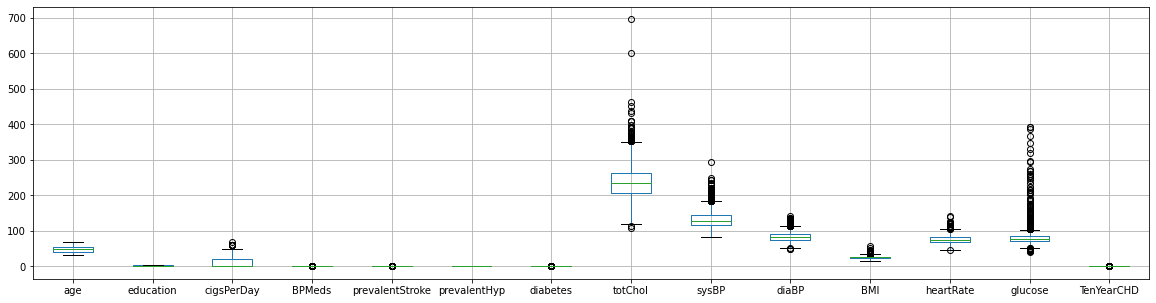

In [14]:
plt.figure(figsize=(20,5))
df.boxplot()


In [15]:
df.shape

(3390, 16)

In [16]:
# Function for identifying and removing outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [17]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [18]:
cols=['cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [19]:
for col in cols:
  df=remove_outlier(df,col)

In [20]:
df.shape

(2890, 16)

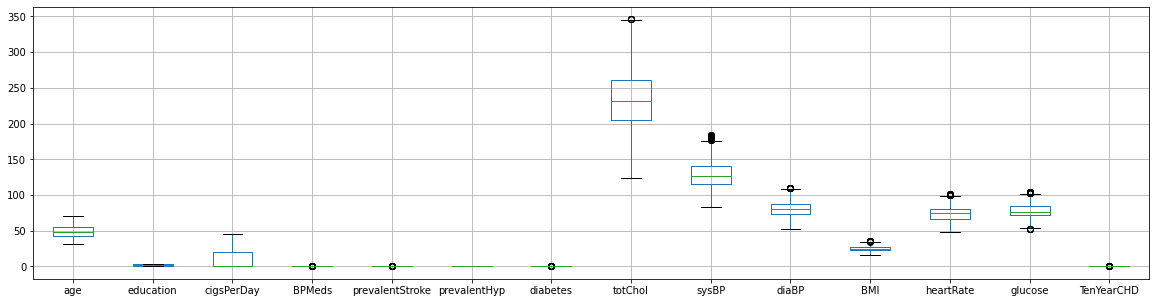

In [21]:
plt.figure(figsize=(20,5))
df.boxplot()

Outliers removed successfully.

##**Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
# Function for plotting each categorical feature against rented_bike_count 
def get_count_plot(x):
  x=x
  y='TenYearCHD'
  plt.figure(figsize=(15,5))
  sns.countplot(x=x,hue=y,data=df)
  plt.title(x+' vs {}'.format(y),fontsize=20)
  plt.xlabel(x,fontsize=15)
  plt.ylabel(y,fontsize=15)

In [ ]:
# for i,predictor in enumerate(df.drop(columns=['id','TenYearCHD'])):
#   get_count_plot(predictor)
  
  

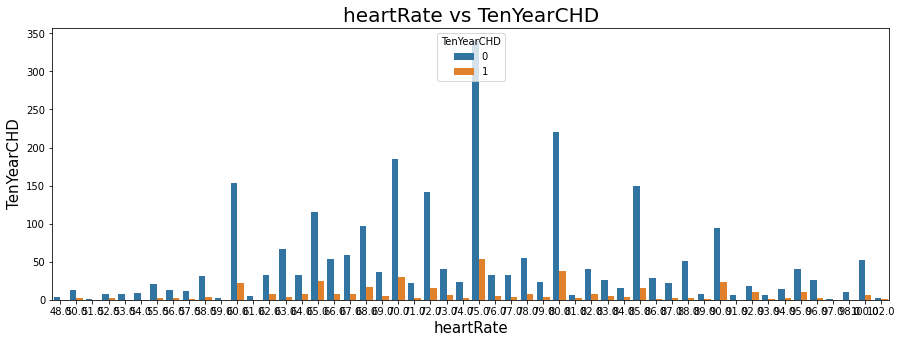

In [ ]:
get_count_plot('heartRate')

Derived Insights:


*   At heartRate 75,the Cardiovascular risk is more 




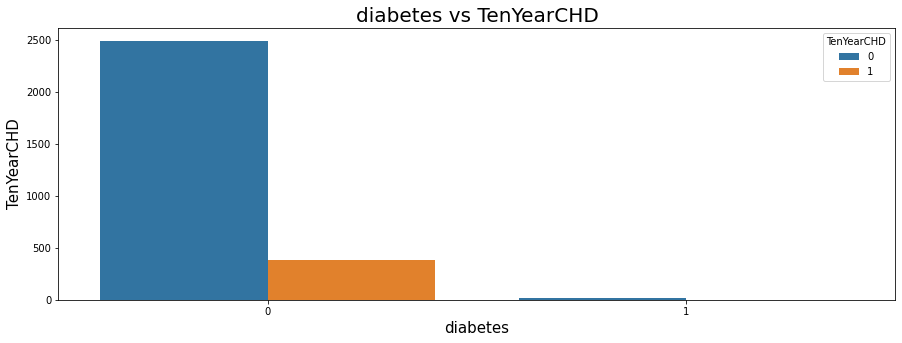

In [ ]:
get_count_plot('diabetes')

Derived Insights:

   

*   Cardiovascular risk is high in patients with no diabetes







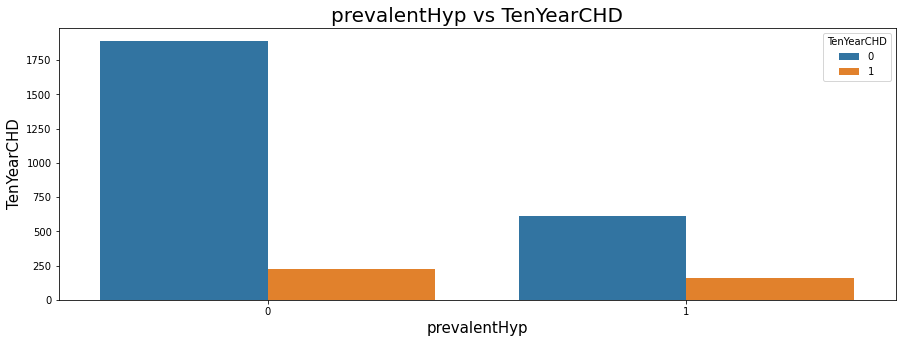

In [ ]:
get_count_plot('prevalentHyp')

Derived Insights:


*  Cardiovascular risk is more in the patients with hypertension than in the patients with no hypertension




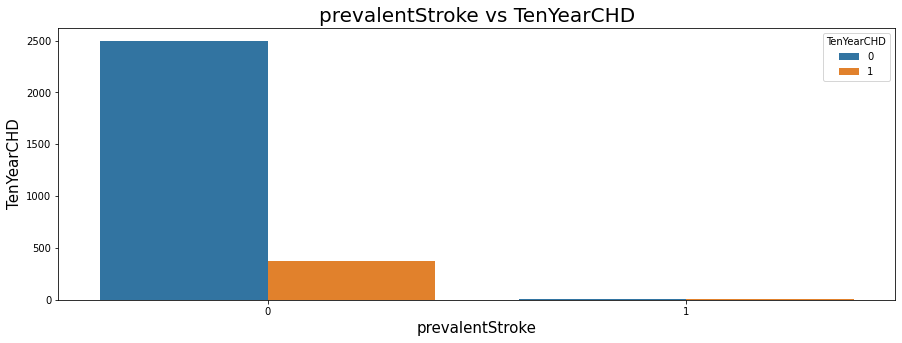

In [ ]:
get_count_plot('prevalentStroke')

Derived Insights:


*   Cardiovascular risk is more in the patients who have got stroke earlier.




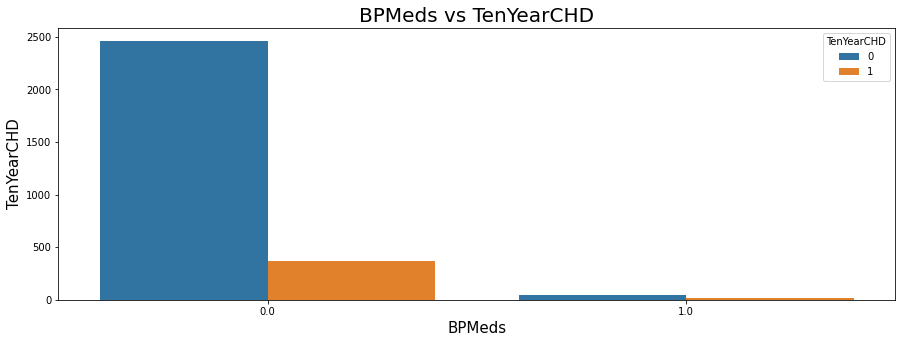

In [ ]:
get_count_plot('BPMeds')

Derived Insights:

*   Cardiovascular risk is more in the patients who are not under Blood Pressure Medication




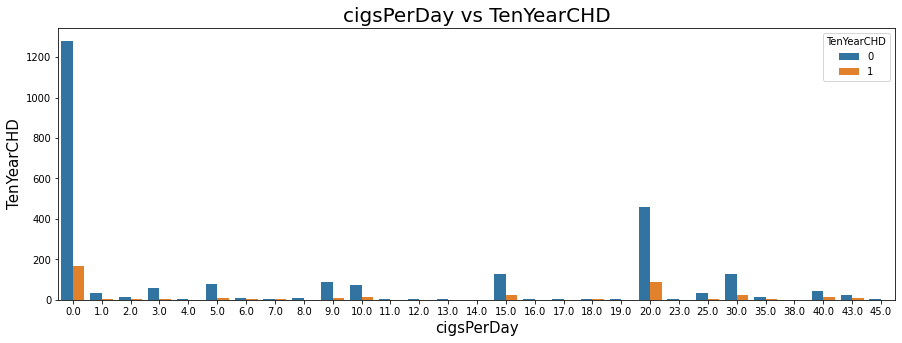

In [ ]:
get_count_plot('cigsPerDay')

Derived Insights:

*   Cardiovascular risk is more in the Non-smokers.



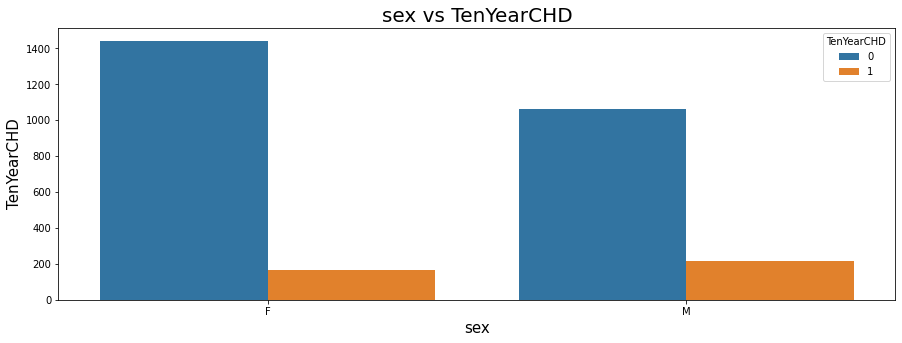

In [ ]:
get_count_plot('sex')

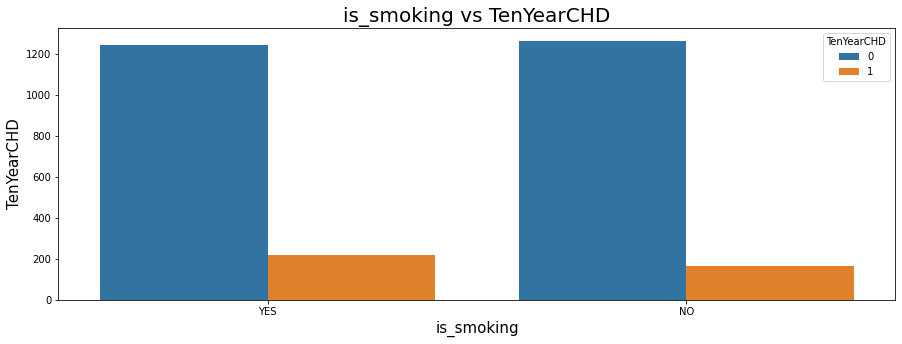

In [ ]:
get_count_plot('is_smoking')

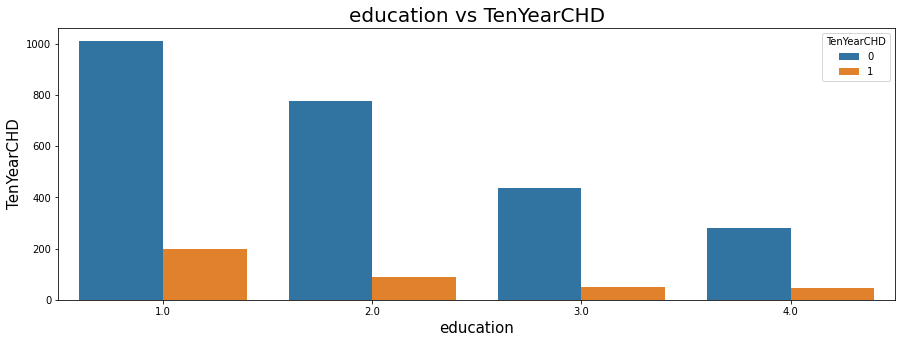

In [ ]:
get_count_plot('education')

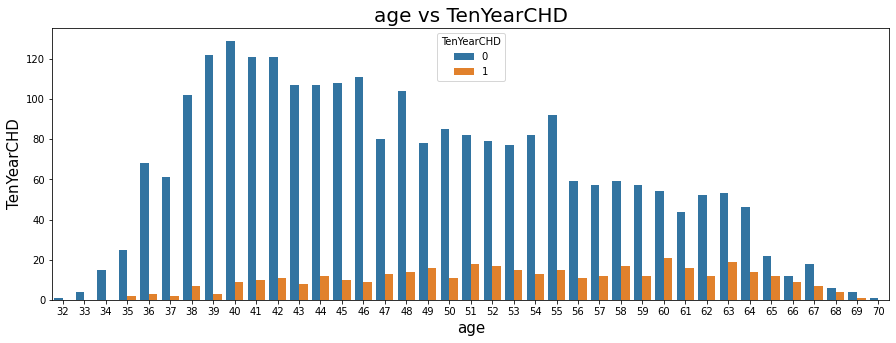

In [ ]:
get_count_plot('age')

**Bivariate Analysis**

In [ ]:
# Taking dataframe in which patients having Cardiovascular risk
card_df=df[df['TenYearCHD']==1]

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Function used for plotting in bivariate analysis
def uniplot(df2,col,title,hue=None):
  df2=df2
  col=col
  title=title
  hue=hue
 
  plt.figure(figsize=(20,5))
  plt.xlabel(f'{df2[col].name}')
  sns.countplot(data=df2,x=col,hue=hue)
  plt.title(title)

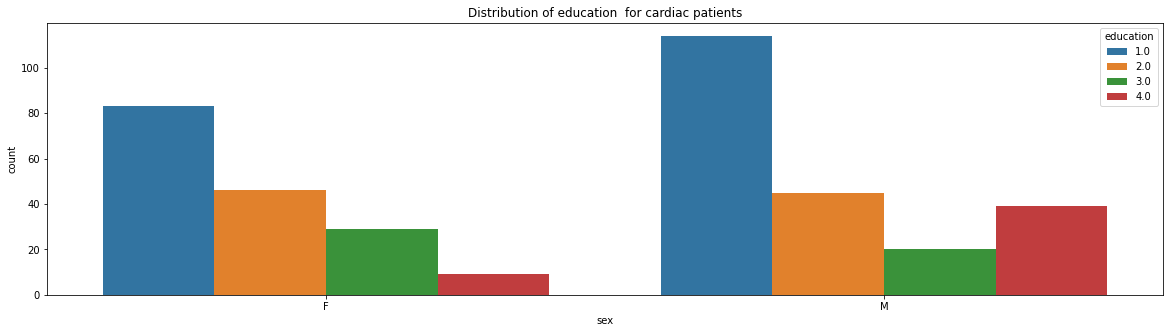

In [ ]:
uniplot(card_df,col='sex',title='Distribution of education  for cardiac patients',hue='education')

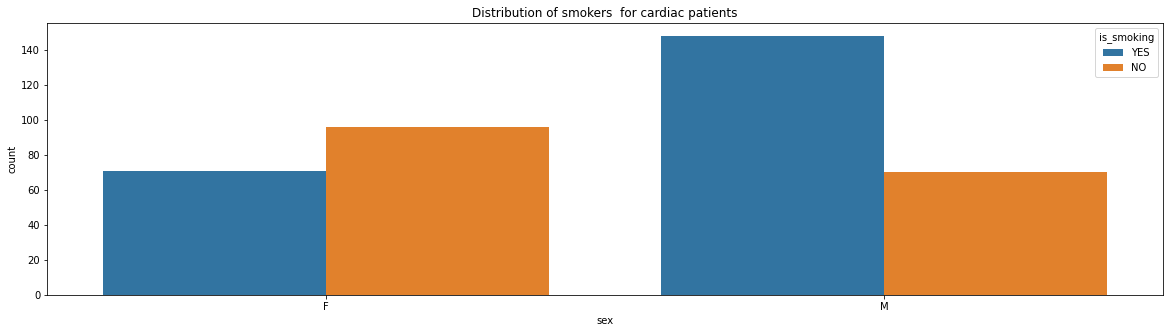

In [ ]:
uniplot(card_df,col='sex',title='Distribution of smokers  for cardiac patients',hue='is_smoking')

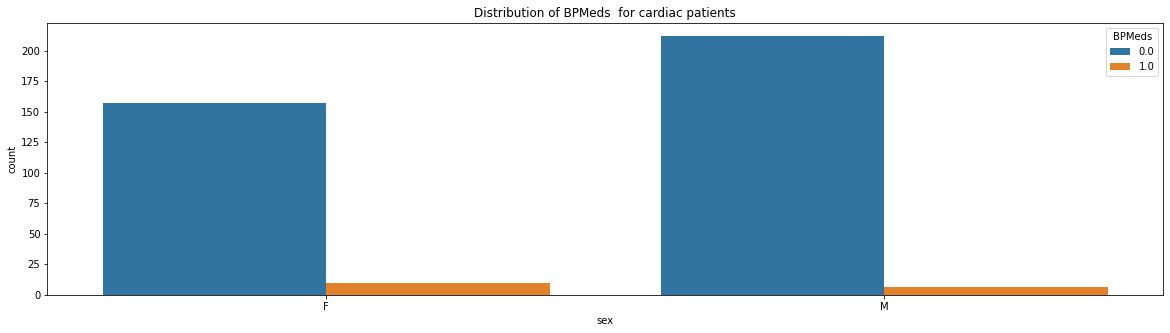

In [ ]:
uniplot(card_df,col='sex',title='Distribution of BPMeds  for cardiac patients',hue='BPMeds')

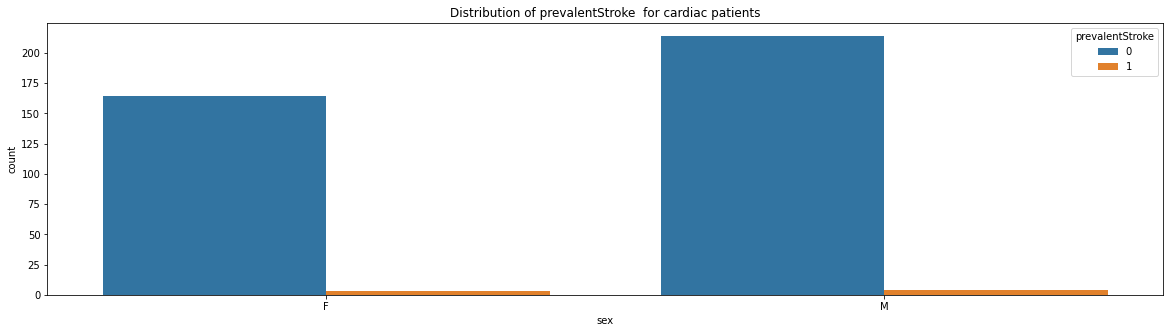

In [ ]:
uniplot(card_df,col='sex',title='Distribution of prevalentStroke  for cardiac patients',hue='prevalentStroke')

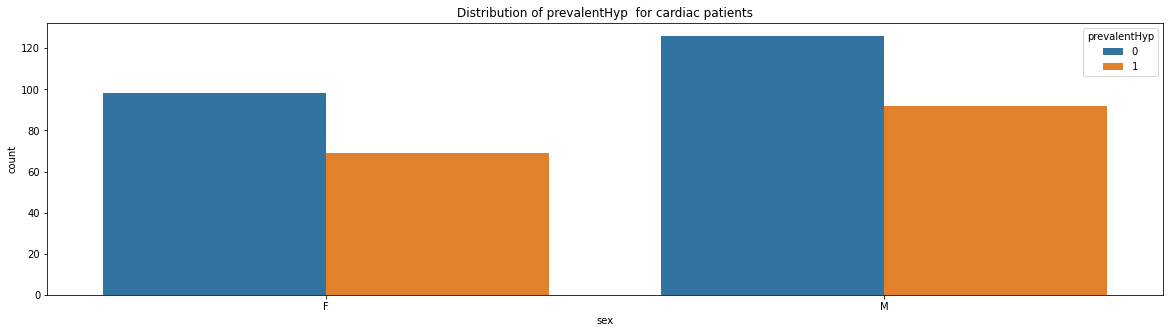

In [ ]:
uniplot(card_df,col='sex',title='Distribution of prevalentHyp  for cardiac patients',hue='prevalentHyp')

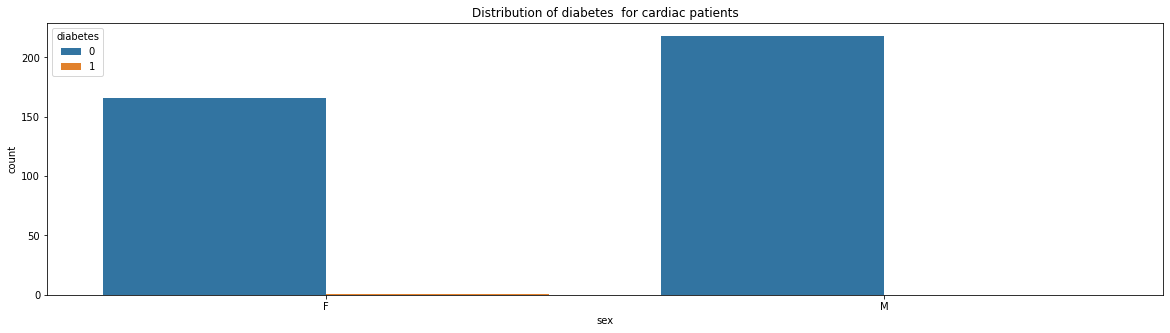

In [ ]:
uniplot(card_df,col='sex',title='Distribution of diabetes  for cardiac patients',hue='diabetes')

# **Correlation Matrix**

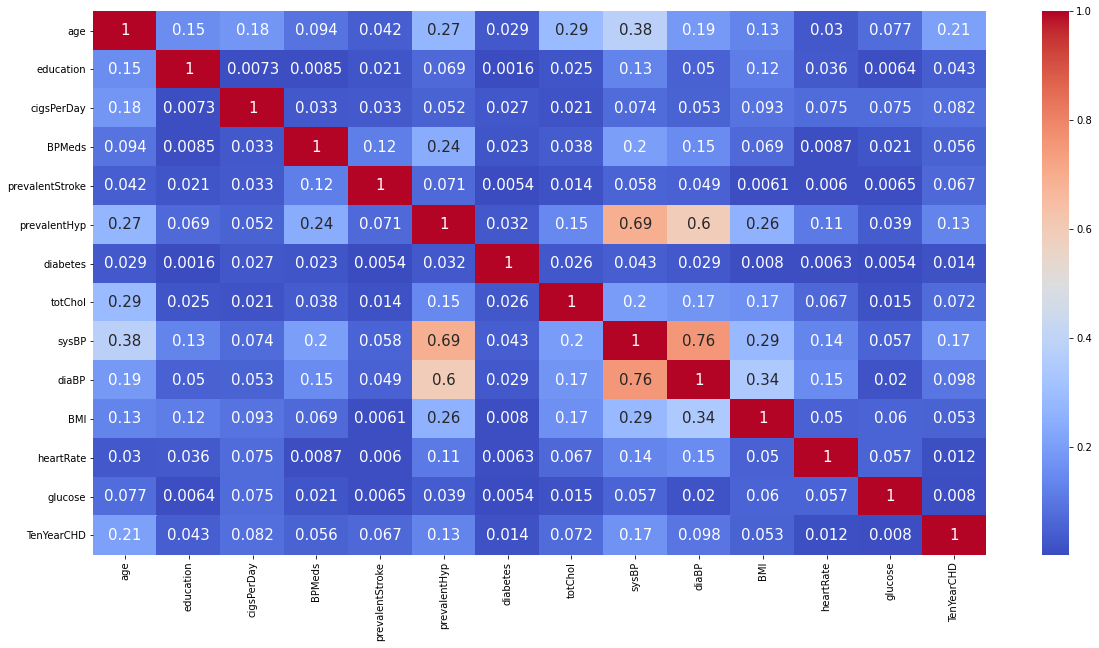

In [22]:
cormat=df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,10))
sns.heatmap(abs(df[top_corr_features].corr()),cmap='coolwarm',annot=True,annot_kws={'size':15})

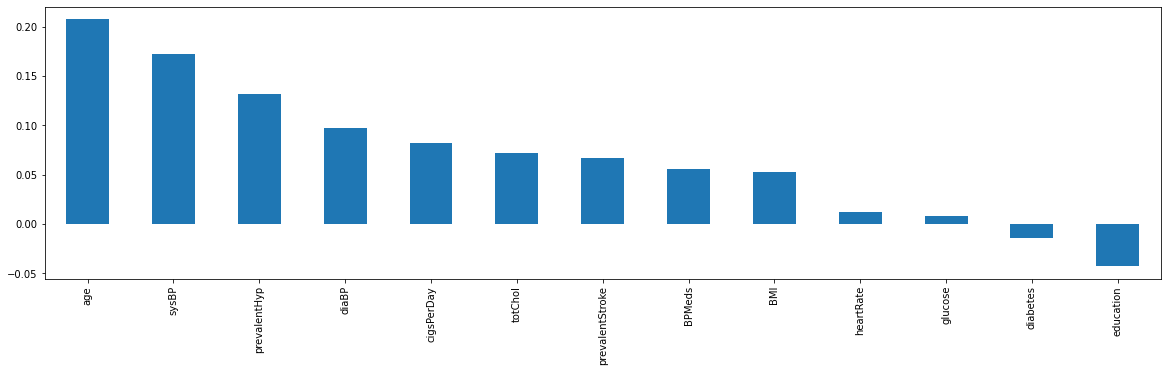

In [23]:
# Features correlation with TenYearCHD
plt.figure(figsize=(20,5))
df.corr()['TenYearCHD'].sort_values(ascending = False)[1:].plot(kind='bar')

In [24]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc93daa890>,
      dtype=object)

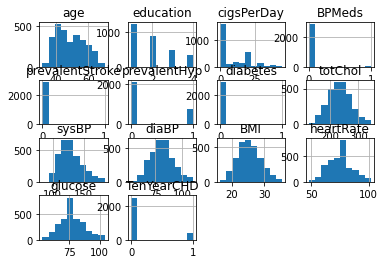

In [25]:
# Plotting histograms
df.hist()

In [26]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [27]:
# Take categorical features and get dummies for them
columns=['education','sex','is_smoking']
dataset=pd.get_dummies(df,columns=columns,prefix=columns)

In [28]:
# Scaling using Standardscaler
from sklearn.preprocessing import StandardScaler
col_to_scale=['age','cigsPerDay','BPMeds','prevalentStroke','diabetes', 'prevalentHyp','totChol', 'sysBP','diaBP', 'BMI','heartRate', 'glucose']
stdscaler=StandardScaler()
dataset[col_to_scale]=stdscaler.fit_transform(df[col_to_scale])



In [29]:
dataset.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,1.767144,-0.526818,-0.146841,-0.074613,-0.605868,-0.072232,-0.322337,1.041707,0.344452,-0.701574,1.439302,0.242111,1,0,1,0,0,1,0,0,1
1,-1.530384,-0.786542,-0.146841,-0.074613,1.650523,-0.072232,-0.545482,2.142995,1.594675,1.255222,-0.256679,-0.264038,0,0,0,0,1,0,1,1,0
2,-0.352695,0.079205,-0.146841,-0.074613,-0.605868,-0.072232,0.396684,-0.720352,-1.001942,-1.431807,1.250860,1.659329,0,1,0,0,0,1,0,0,1
3,0.118380,0.944953,-0.146841,-0.074613,1.650523,-0.072232,-0.024811,1.592351,0.632965,0.824499,-0.633564,1.659329,1,1,0,0,0,0,1,0,1
4,1.767144,1.810700,-0.146841,-0.074613,-0.605868,-0.072232,0.173540,0.408467,0.344452,0.299644,-0.445122,-0.061579,0,1,0,0,0,1,0,0,1


In [30]:
dataset.drop('TenYearCHD',axis=1,inplace=True)
dataset['TenYearCHD']=df['TenYearCHD']

In [31]:
dataset.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,1.767144,-0.526818,-0.146841,-0.074613,-0.605868,-0.072232,-0.322337,1.041707,0.344452,-0.701574,1.439302,0.242111,0,1,0,0,1,0,0,1,1
1,-1.530384,-0.786542,-0.146841,-0.074613,1.650523,-0.072232,-0.545482,2.142995,1.594675,1.255222,-0.256679,-0.264038,0,0,0,1,0,1,1,0,0
2,-0.352695,0.079205,-0.146841,-0.074613,-0.605868,-0.072232,0.396684,-0.720352,-1.001942,-1.431807,1.250860,1.659329,1,0,0,0,1,0,0,1,0
3,0.118380,0.944953,-0.146841,-0.074613,1.650523,-0.072232,-0.024811,1.592351,0.632965,0.824499,-0.633564,1.659329,1,0,0,0,0,1,0,1,1
4,1.767144,1.810700,-0.146841,-0.074613,-0.605868,-0.072232,0.173540,0.408467,0.344452,0.299644,-0.445122,-0.061579,1,0,0,0,1,0,0,1,0


In [32]:
X=dataset[:-1]

**Checking whether Dataset is balanced or not**

In [33]:
dataset['TenYearCHD'].value_counts()

0    2505
1     385
Name: TenYearCHD, dtype: int64

In [34]:
# Percentage of majority class(0) in target variable
2505/(385+2505)

0.8667820069204152

In [35]:
# Percentage of minority class(1) in target variable
385/(385+2505)

0.13321799307958476

Dataset is highly imbalanced with ratio **86.7:13.3**. So we try to balance the classes using **Synthetic Minority OverSampling Technique(SMOTE)**

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(dataset.iloc[:,0:-1], dataset['TenYearCHD'])

print('Original dataset shape', len(dataset))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2890
Resampled dataset shape 5010


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
x_smote.shape

(5010, 20)

In [38]:
y_smote.shape

(5010,)

In [39]:
pd.DataFrame(y_smote).value_counts()

1    2505
0    2505
dtype: int64

Now the dataset is **Balanced**

# **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Finding suitable k value which gives highest accuracy
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=k)
  cv_score=cross_val_score(knn,x_smote,y_smote,cv=10)
  knn_scores.append(cv_score.mean())


Text(0.5, 1.0, 'Scores for different k values')

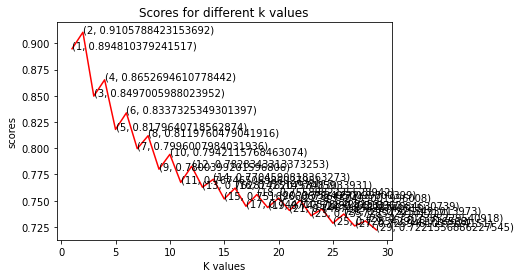

In [ ]:
# Plotting k vlaues and its respective model accuracies
plt.plot([k for k in range(1,30)],knn_scores,color='red')
for i in range(1,30):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xlabel('K values') 
plt.ylabel('scores')
plt.title('Scores for different k values') 

From the above plot,it is clear that accuracy is more at **k(n_neighbors)=2**

# **KNN Model with n_neighbors=2**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
score=cross_val_score(knn,x_smote,y_smote,cv=10)
score.mean()


0.9105788423153692

**Input split**

In [ ]:
# Dependent and Independent Varaibles
# X=dataset.drop('TenYearCHD',axis=1)
# y=dataset['TenYearCHD']

In [40]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=.20,random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# Predicted values for train and test data
train_preds=knn.predict(X_train)
test_preds=knn.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

# Training data metrics
print('Training data metrics')

# con_matrix_train=confusion_matrix(y_train,train_preds)
# print('confusion matrix:',con_matrix_train)

acc_score_train=accuracy_score(y_train,train_preds)
print('accuracy score of training data:',acc_score_train)

# Roc_Auc_score_train=roc_auc_score(y_train,train_preds)
# print('roc auc score:',Roc_Auc_score_train)

# Testing data metrics
print('Testing data metrics')

con_matrix_test=confusion_matrix(y_test,test_preds)
print('confusion matrix:',con_matrix_test)

print(classification_report(y_test,test_preds))

acc_score_test=accuracy_score(y_test,test_preds)
print('accuracy score of testing data:',acc_score_test)

# Roc_Auc_score_test=roc_auc_score(y_test,test_preds)
# print('roc auc score:',Roc_Auc_score_test)



Training data metrics
accuracy score of training data: 0.9960079840319361
Testing data metrics
confusion matrix: [[409 106]
 [ 12 475]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       515
           1       0.82      0.98      0.89       487

    accuracy                           0.88      1002
   macro avg       0.89      0.88      0.88      1002
weighted avg       0.90      0.88      0.88      1002

accuracy score of testing data: 0.8822355289421158


**Accuracy:**

Accuracy for training dataset is 99.6%

Accuracy for testing data is 88.2%


Accuracy for testing data is less in KNN model.So let's try other models

# **Trying Different Models**

In [41]:
# Importing Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier()]

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
def train(model):
  kfold=KFold(n_splits=5,random_state=42,shuffle=True)
  pred=cross_val_score(model,x_smote,y_smote,cv=kfold)
  cv_score=pred.mean()
  print('Model:',model)
  print('Cv score:',cv_score)

In [ ]:
for model in models:
  train(model)

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cv score: 0.834131736526946
Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, wa

From the above ,it is clear that **Random Forest Classifier** is giving more accuracy

# **Model with Ranadom Forest Classifier Algorithm**

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
# Best Parameters
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [45]:
# Best estimator
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rf_model=rf_grid.best_estimator_

Plot the Graph of the Features Importance

In [47]:
features =X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [48]:
X.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0',
       'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES', 'TenYearCHD'],
      dtype='object')

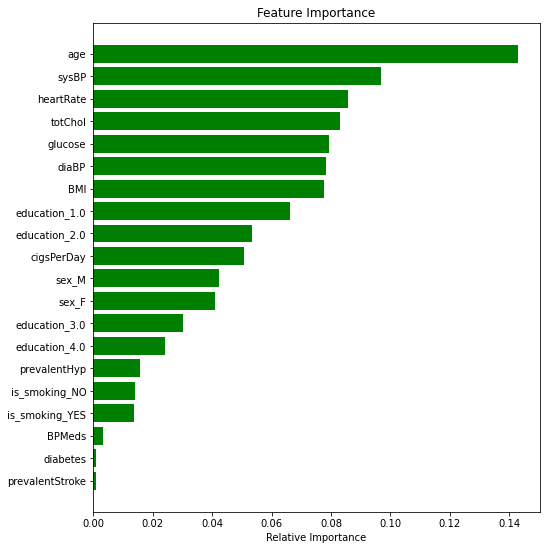

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,9)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [50]:
# Predicted values for train and test data 
train_preds=rf_model.predict(X_train)
test_preds=rf_model.predict(X_test)

**Evaluation Metrics**

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

# Training data metrics
print('Training data metrics')

# con_matrix_train=confusion_matrix(y_train,train_preds)
# print('confusion matrix:',con_matrix_train)

acc_score_train=accuracy_score(y_train,train_preds)
print('accuracy score of training data:',acc_score_train)

# Roc_Auc_score_train=roc_auc_score(y_train,train_preds)
# print('roc auc score:',Roc_Auc_score_train)

# Testing data metrics
print('Testing data metrics')

con_matrix_test=confusion_matrix(y_test,test_preds)
print('confusion matrix:',con_matrix_test)

print(classification_report(y_test,test_preds))

acc_score_test=accuracy_score(y_test,test_preds)
print('accuracy score of testing data:',acc_score_test)

# Roc_Auc_score_test=roc_auc_score(y_test,test_preds)
# print('roc auc score:',Roc_Auc_score_test)

Training data metrics
accuracy score of training data: 1.0
Testing data metrics
confusion matrix: [[493  22]
 [ 44 443]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       515
           1       0.95      0.91      0.93       487

    accuracy                           0.93      1002
   macro avg       0.94      0.93      0.93      1002
weighted avg       0.93      0.93      0.93      1002

accuracy score of testing data: 0.9341317365269461


**Accuracy:**


1.    Accuracy for train dataset:100%
2.   Accuracy for test dataset:93.4%

